Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

Добавьте первые разности по стоимости доллара и евро к рублю

сделайте ее перрасчет (ресемплинг) в представление по неделям.

Постройте модель предсказания 1-й точки от текущей (h=1).

Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [52]:
path_brent = 'brent.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()


,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [61]:
rub_doll=pd.read_excel('rc.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx'], axis=1,inplace = True)
rub_doll.head()

,data,curs
2010-09-01,2010-09-01,30.8669
2010-09-02,2010-09-02,30.8001
2010-09-03,2010-09-03,30.6858
2010-09-04,2010-09-04,30.6922
2010-09-07,2010-09-07,30.5771


In [62]:
rub_e=pd.read_excel('r.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


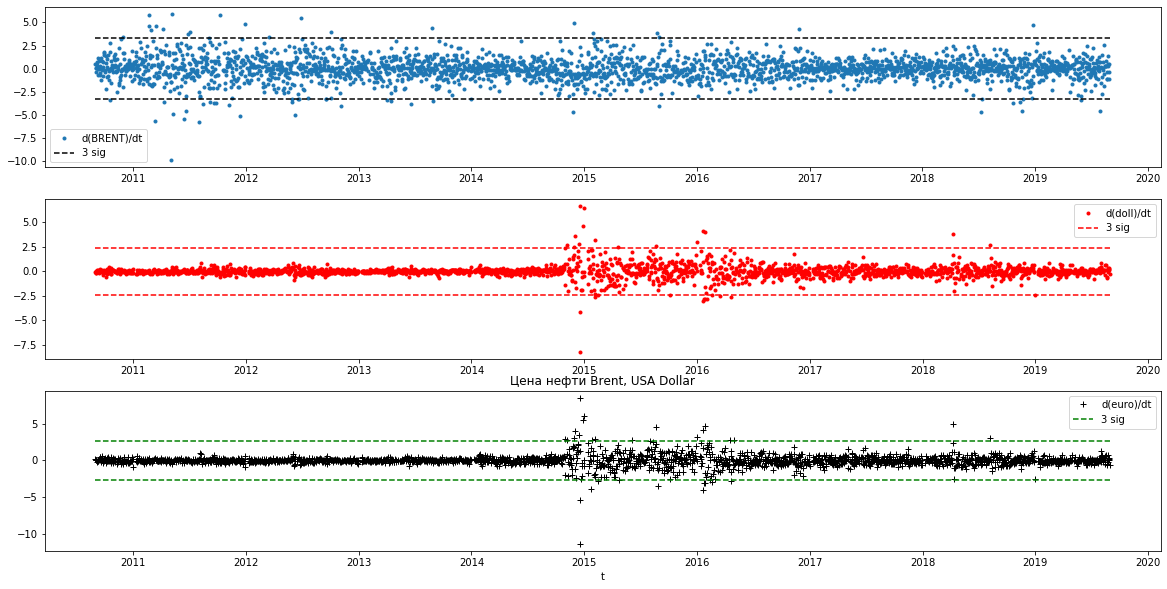

In [63]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
s_brent = np.std(d_brent_data)**0.5 *3

d_rub_doll = rub_doll['curs'].values[1:]- rub_doll['curs'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]
s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(3,1,2)
plt.plot(rub_doll.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

In [64]:
d_brent_data = pd.DataFrame(d_brent_data[:2227])


In [65]:
d_brent_data = d_brent_data.rename(columns={0: "Brent"})


In [66]:
d_brent_data["Dollar"] = d_rub_doll
d_brent_data["Euro"] = d_rub_e



In [67]:
d_brent_data.index = pd.to_datetime(rub_doll['data'].values[:2227])



In [68]:
d_brent_data

,Brent,Dollar,Euro
2010-09-01,0.52,-0.0668,0.1527
2010-09-02,-0.32,-0.1143,0.1247
2010-09-03,0.05,0.0064,0.0604
2010-09-04,0.01,-0.1151,0.1215
2010-09-07,0.24,0.1548,-0.1505
...,...,...,...
2019-08-24,0.11,0.3689,0.7712
2019-08-27,0.35,0.2873,0.2136
2019-08-28,0.16,0.1519,0.0492
2019-08-29,-1.94,0.3344,0.2975


In [69]:
d_brent_data_w = d_brent_data.copy().resample('W').mean()
d_brent_data_w.head()

,Brent,Dollar,Euro
2010-09-05,0.065,-0.07245,0.114825
2010-09-12,0.356,0.02120,-0.029700
2010-09-19,0.012,0.05956,0.243620
2010-09-26,-0.098,-0.07380,0.136080
2010-10-03,0.174,-0.02318,0.150540


In [70]:
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()


In [71]:
d_brent_data_w = d_brent_data_w.dropna()


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scl_target=StandardScaler() 

h=1
target = d_brent_data_w["Brent"].values[h:].reshape((d_brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(461, 1)

In [73]:
scl_x=StandardScaler() 

X = d_brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(461, 3)

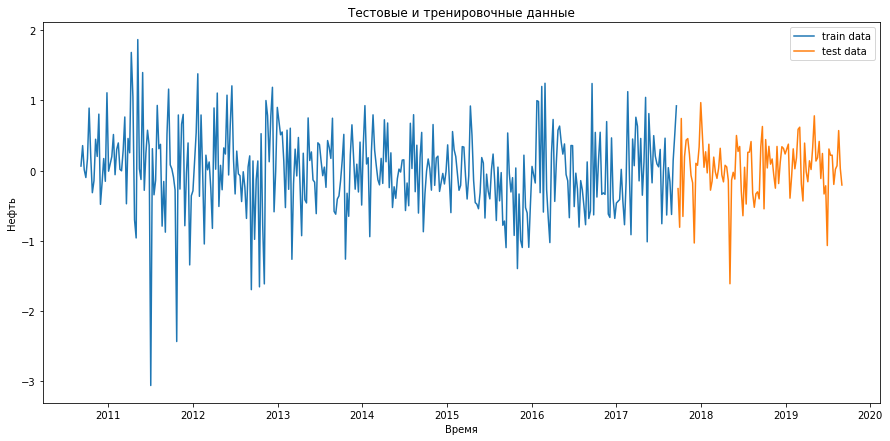

In [74]:
train, test = split_data( d_brent_data_w[-2000:], -100)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [76]:
model_g = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)


In [77]:
X_train =X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [78]:
model_g.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=15,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [79]:
y_test_pred_g = model_g.predict(X_test)


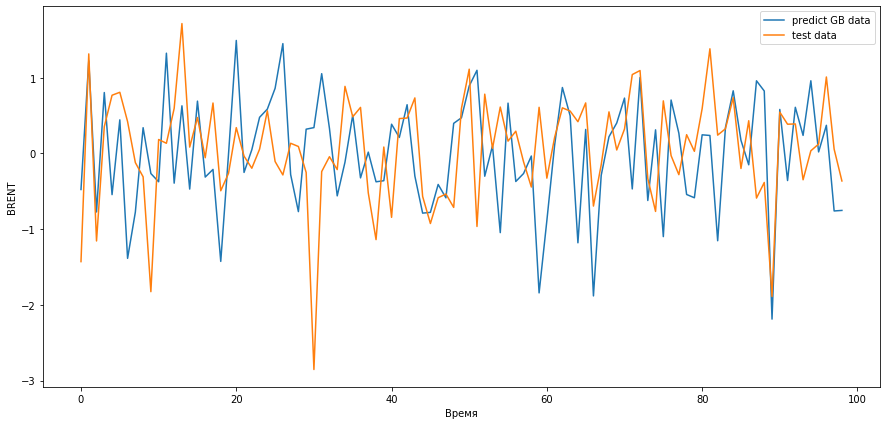

In [80]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [82]:
scl_target=StandardScaler() 
h=1
target = d_brent_data_w["Brent"].values[h:].reshape((d_brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(461, 1)

In [83]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.8182018632002291 
ошибка mae  :   0.6935076743644769 
оценка R2 :   -0.6442802845057243


In [84]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   291.82842970683976 %
